In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import math as m
import numpy as np
import random
import copy

In [2]:
def makeagents(N, money):
    agents = np.zeros(N)
    for i in range(len(agents)):
        agents[i] = money
    return agents

In [3]:
def transactions(agent_array, tr_num):
    people = copy.copy(agent_array)
    total_money_begin = sum(agent_array)
    current = 0
    while current <= tr_num:
        i = random.randint(0,len(agent_array)-1)
        j = random.randint(0,len(agent_array)-1)
        m_i = people[i]
        m_j = people[j]
        total_m = m_i + m_j
        epsilon = random.uniform(0,1)
        if people[i]>0 and people[j]>0:
            people[i] = epsilon*total_m
            people[j] = (1-epsilon)*total_m
        else:
            continue
        current += 1
    total_money_end = sum(people)
    #print(total_money_begin, total_money_end)
    
    return people

In [4]:
def avg_money(array):
    length = len(array)
    average = 0
    for i in array:
        average += i/length
    return round(average,2)

In [5]:
def avg_money_sq(array):
    length = len(array)
    average = 0
    for i in array:
        average += i**2/length
    return round(average,2)

def variance(array):
    return (avg_money_sq(array)-(avg_money(array))**2)**(1/2)

1499.78

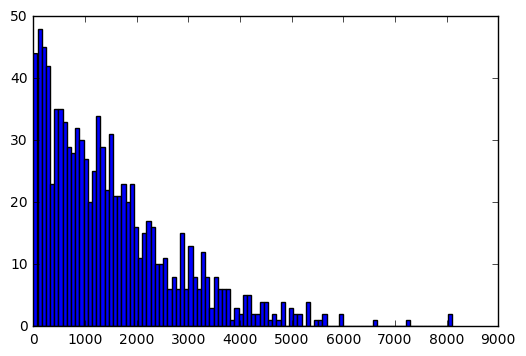

In [6]:
trial_1 = transactions(makeagents(1000,1500),2000)
plt.hist(trial_1,bins=100)
avg_money(trial_1)

10685.57

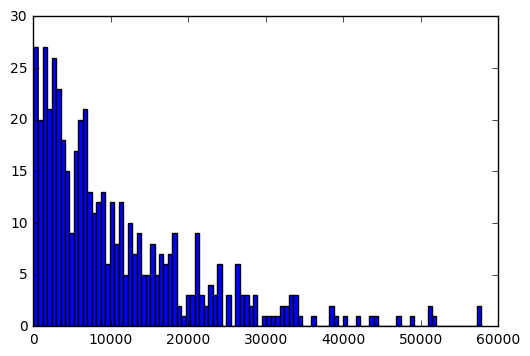

In [7]:
trial_2 = transactions(makeagents(500,10000),1000000)
plt.hist(trial_2 ,bins=100)
avg_money(trial_2)

398.94

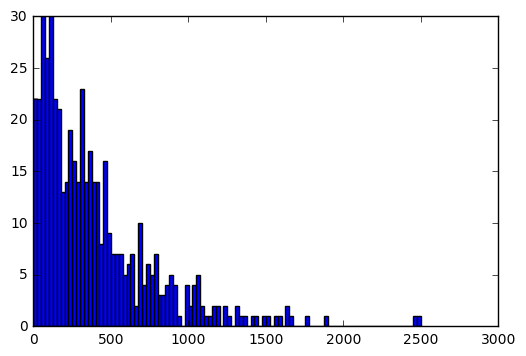

In [8]:
trial_3 = transactions(makeagents(500,420),1000000)
plt.hist(trial_3 ,bins=100)
avg_money(trial_3)

In [9]:
def distribution_exp(array):
    avg = avg_money(array)
    beta = 1/avg
    mon = np.linspace(0,max(array))
    wn = []
    for i in mon:
        wn.append(beta*m.exp(-beta*i))
    h = plt.plot(mon, wn, lw=2)
    
    plt.xlabel("Amount of Money that The Individual Possesses")
    plt.ylabel("Wealth (1/Money)")
    plt.title("Distribution of Wealth")
    
    plt.show()

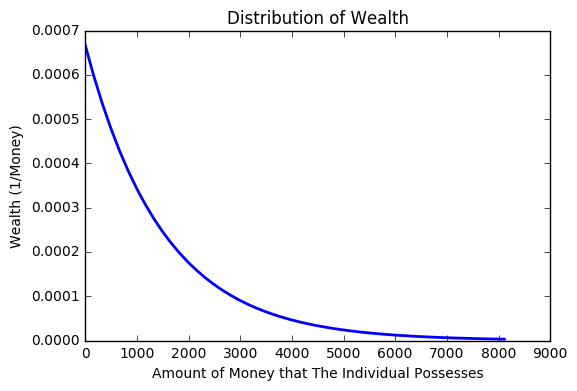

In [10]:
distribution_exp(trial_1)

In [11]:
def distribution_log(array):
    avg = avg_money(array)
    beta = 1/avg
    mon = np.linspace(0,max(array))
    wn = []
    for i in mon:
        wn.append(m.log(beta*m.exp(-beta*i)))
    h = plt.plot(mon, wn, lw=2)
    
    plt.xlabel("Amount of Money that The Individual Possesses")
    plt.ylabel("Log of Wealth (1/Money)")
    plt.title("Distribution of Wealth")
    
    plt.show()

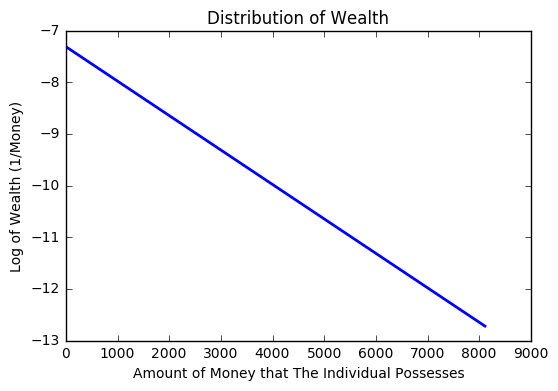

In [12]:
distribution_log(trial_1)

In [13]:
def overlay_exp(array):
    avg = avg_money(array)
    beta = 1/avg
    
    fig = plt.figure(figsize=(5,5))
    ax  = fig.add_subplot(111)
    
    # now plot
    data= array
    counts, bins, bars = ax.hist(data, bins=100)
    mon = np.linspace(0,max(array))
    wn = []
    for i in mon:
        wn.append(max(counts)*m.exp(-beta*i))
    h = ax.plot(mon, wn, lw=2, color='r')
    
    #Nice-ness
    plt.xlabel("Amount of Money that The Individual Possesses")
    plt.ylabel("Counts of Histogram")
    plt.title("Distribution of Wealth")
    
    # show
    plt.show()

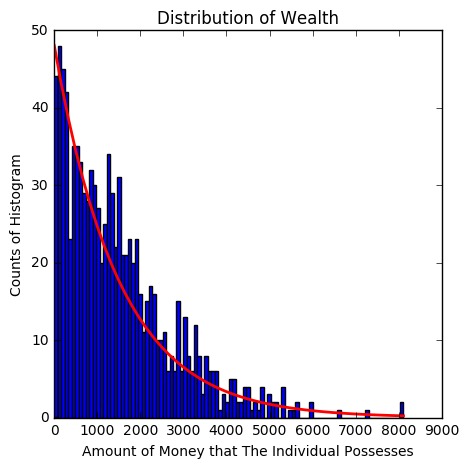

In [14]:
overlay_exp(trial_1)

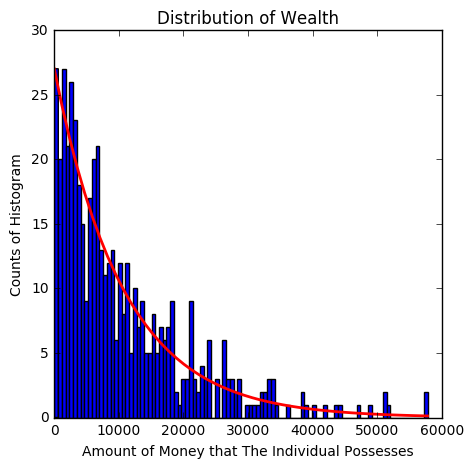

In [15]:
overlay_exp(trial_2)

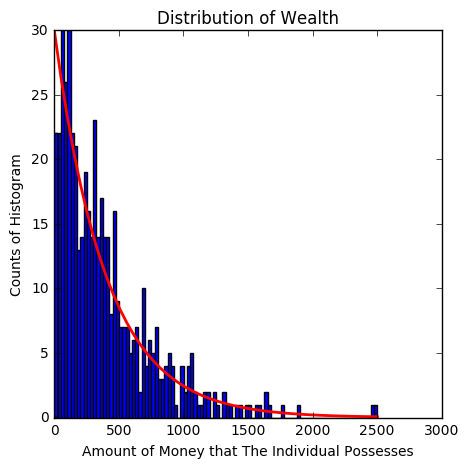

In [16]:
overlay_exp(trial_3)

In [17]:
def trans_save(agent_array, tr_num, lmbda):
    people = copy.copy(agent_array)
    #total_money_begin = sum(agent_array)
    current = 0
    while current <= tr_num:
        i = random.randint(0,len(agent_array)-1)
        j = random.randint(0,len(agent_array)-1)
        m_i = people[i]
        m_j = people[j]
        total_m = m_i + m_j
        epsilon = random.uniform(0,1)
        if people[i]>0 and people[j]>0:
            dm = (1-lmbda)*(epsilon*m_j-(1-epsilon)*m_i)
            people[i] = m_i+dm
            people[j] = m_j-dm
        else:
            continue
        current += 1
    #total_money_end = sum(people)
    #print(total_money_begin, total_money_end)
    
    return people

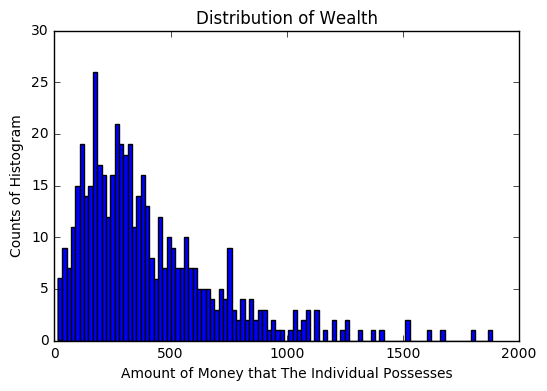

In [18]:
trial_4 = trans_save(makeagents(500,420),1000000, 0.25)
plt.hist(trial_4, bins=100)
plt.xlabel("Amount of Money that The Individual Possesses")
plt.ylabel("Counts of Histogram")
plt.title("Distribution of Wealth")

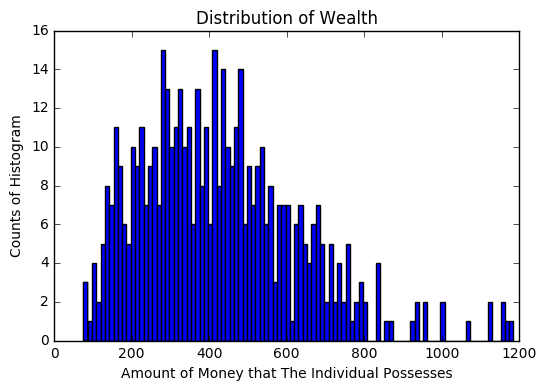

In [19]:
trial_5 = trans_save(makeagents(500,420),1000000, 0.5)
plt.hist(trial_5, bins=100)
plt.xlabel("Amount of Money that The Individual Possesses")
plt.ylabel("Counts of Histogram")
plt.title("Distribution of Wealth")

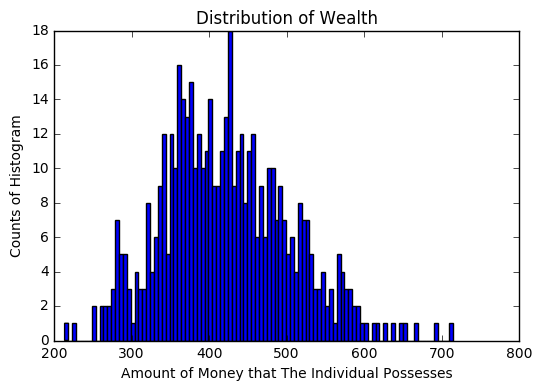

In [20]:
trial_6 = trans_save(makeagents(500,420),1000000, 0.9)
plt.hist(trial_6, bins=100)
plt.xlabel("Amount of Money that The Individual Possesses")
plt.ylabel("Counts of Histogram")
plt.title("Distribution of Wealth")

In [21]:
def overlay_gauss(array):
    avg = avg_money(array)
    sigma = variance(array)
    
    fig = plt.figure(figsize=(5,5))
    ax  = fig.add_subplot(111)
    
    # now plot
    data= array
    counts, bins, bars = ax.hist(data, bins=100, normed=True)
    mon = np.linspace(0,max(array))
    h = ax.plot(mon, mlab.normpdf(mon, avg, sigma), lw=2, color='r')
    
    #Nice-ness
    plt.xlabel("Amount of Money that The Individual Possesses")
    plt.ylabel("Counts of Histogram")
    plt.title("Distribution of Wealth")
    
    # show
    plt.show()

In [22]:
avg_money(trial_4)

408.00999999999999

In [23]:
avg_money_sq(trial_4)

258813.06

In [24]:
variance(trial_4)

303.87645499445989

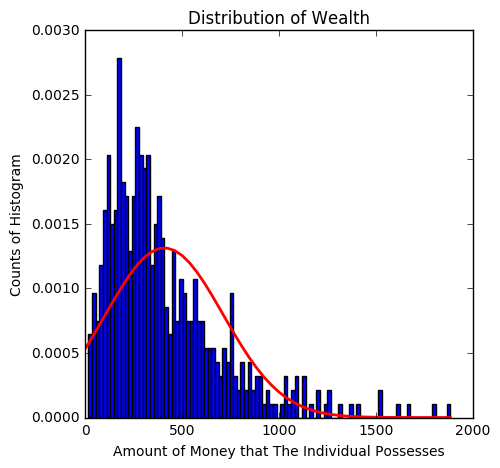

In [25]:
 overlay_gauss(trial_4)

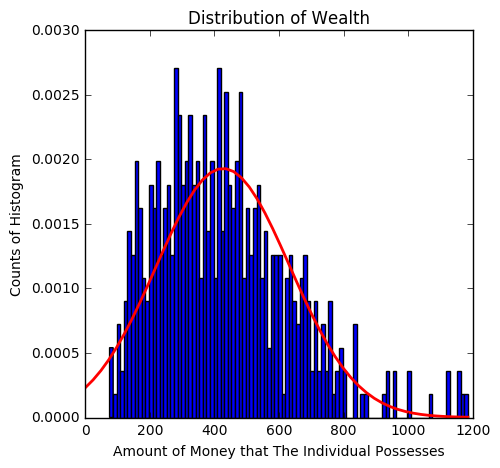

In [26]:
 overlay_gauss(trial_5)

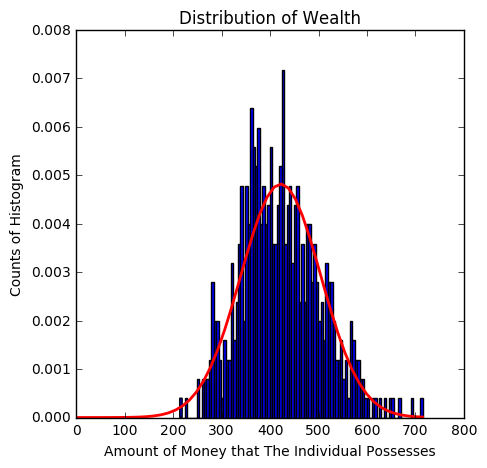

In [27]:
 overlay_gauss(trial_6)